Импорт библиотек

In [1]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt

Начальные настройки

In [2]:
stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (3, 3)

Функции отрисовки графиков

In [13]:
def plotTS(y1, y2, time, color1 = "b", color2 = "r"):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = color1, label = "N1")
    plt.plot(time, y2, c = color2, label = "N2")
    plt.xlabel("time")          
    plt.ylabel("N1, N2")
    plt.title(f"Численное решение Хищник-Жертва")
    plt.legend()
    plt.grid(True)              
    plt.show()

In [14]:
def plotFP(y1, y2, color = "b", starts = None, nulls = None):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1], c = color)
    if nulls is not None:
        for i in nulls:
            plt.scatter(i[0], i[1], c = color)
    plt.xlabel("N1")
    plt.ylabel("N2")
    plt.title(f"Фазовый портрет системы Хищник-Жертва")
    plt.grid(True)
    plt.show()

Функции систем моделей Л.В.

In [36]:
def f(y, t, eps_1, gamma_1, eps_2, gamma_2, alpha = 0, err = 0):
    y1, y2=y
    dy1 = eps_1 * y1 - gamma_1 * y1 * y2 + err
    dy2 = -eps_2 * y2 + gamma_2 * y1 * y2 - err
    return [dy1, dy2]

In [16]:
def falpha(y, t, eps_1, gamma_1, eps_2, gamma_2, alpha = 0, err = 0):
    y1, y2=y
    dy1 = eps_1 * y1 - gamma_1 * y1 * y2 + alpha * y1**2 + err
    dy2 = -eps_2 * y2 + gamma_2 * y1 * y2 + alpha * y2**2 - err
    return [dy1, dy2]

In [17]:
def falphapm(y, t, eps_1, gamma_1, eps_2, gamma_2, alpha = 0, err = 0):
    y1, y2=y
    dy1 = eps_1 * y1 - gamma_1 * y1 * y2 + alpha * y1**2 + err
    dy2 = -eps_2 * y2 + gamma_2 * y1 * y2 - alpha * y2**2 - err
    return [dy1, dy2]

Функция проведения анализа

In [38]:
def analyze(f, nulls, starts, alpha = 0, err = 0, time_end = 20):
    time = np.linspace(0, time_end, 5000)
    for i in starts:
        print(f"In {i} point")
        w = integr.odeint(f, i, time, (5, 4.5, 2, 1, alpha, err))
        y1 = w[:, 0]
        y2 = w[:, 1]
        
        plotTS(y1, y2, time)
        plotFP(y1, y2, starts = [i], nulls = nulls)

In [0, 0] point


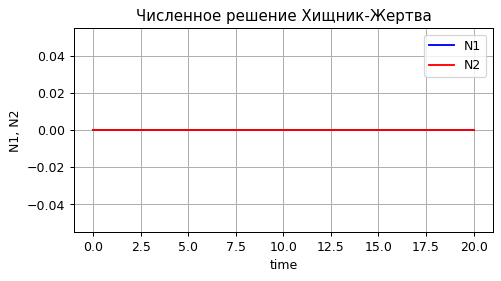

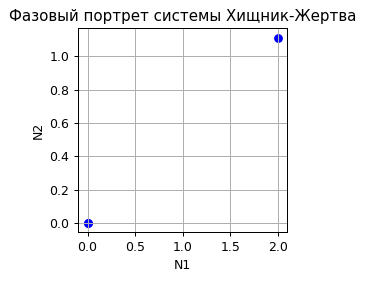

In [1, 1] point


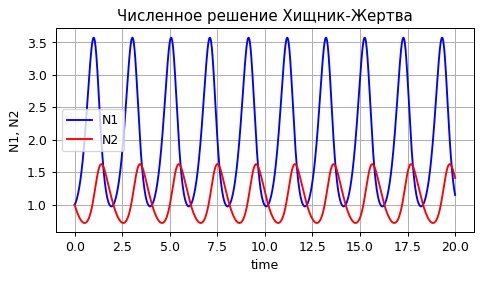

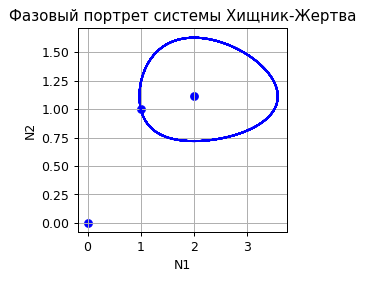

In [3, 3] point


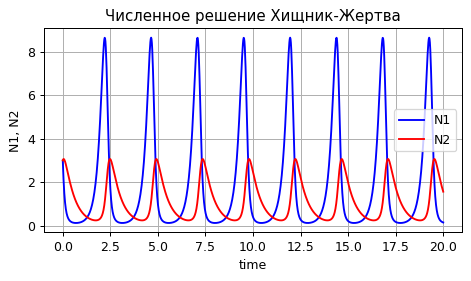

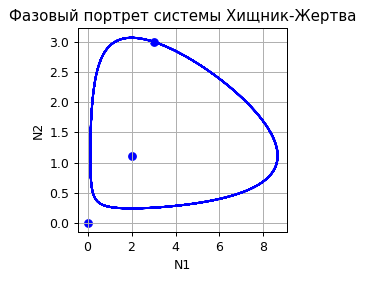

In [30]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0],
    [2, 10/9]
]

analyze(f, nulls, starts)

Вывод: наблюдаем две точки равновесия, первая (0, 0) неустойчивое равновесие типа "седло", вторая (2, 10/9) устойчивое равновесия типа "центр"

In [0, 0] point


c:\users\bigzet\appdata\local\programs\python\python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


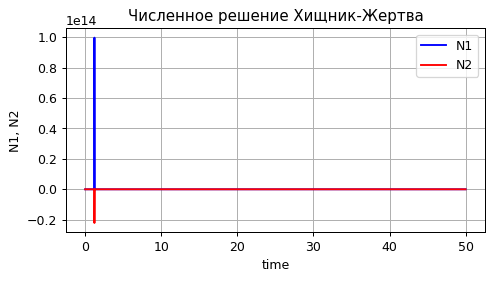

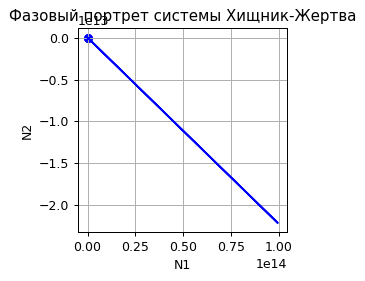

In [1, 1] point


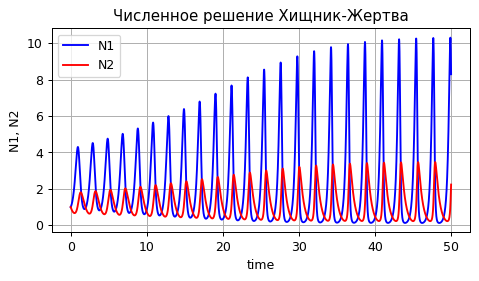

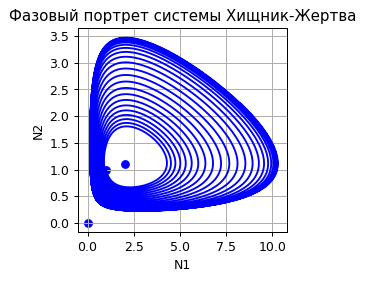

In [3, 3] point


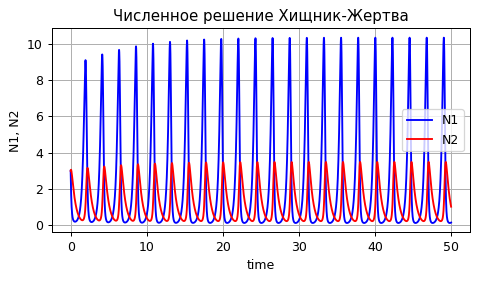

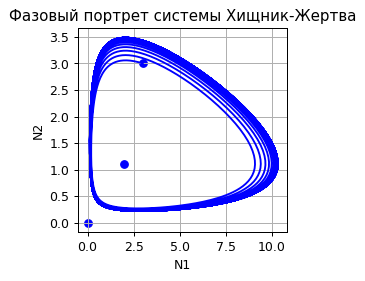

In [5, 5] point


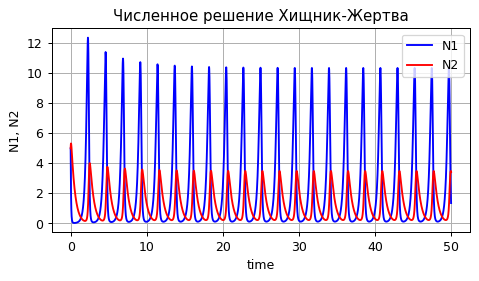

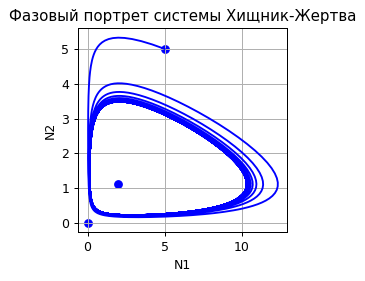

In [42]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3],
    [5, 5]
]

nulls = [
    [0, 0],
    [2, 10/9]
]

analyze(f, nulls, starts, err=0.2, time_end = 50)

Вывод, классическая модель структурно не устойчива, при малейших отклонениях точка центра переходит в предельный цикл

In [0, 0] point


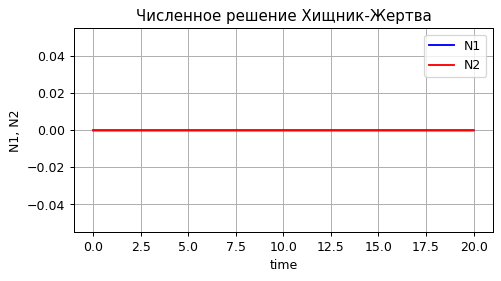

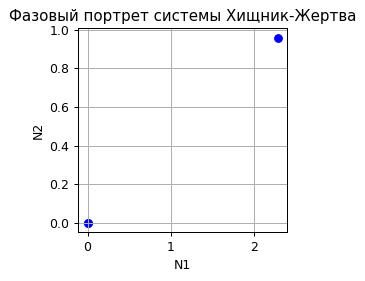

In [1, 1] point


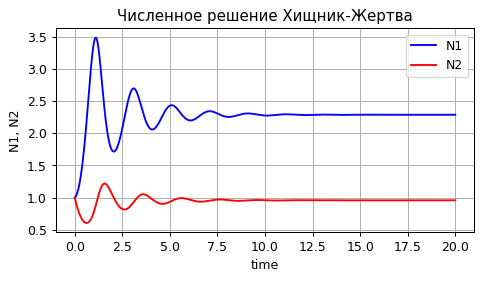

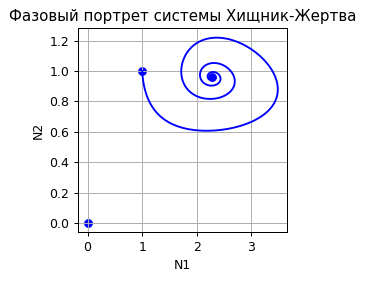

In [3, 3] point


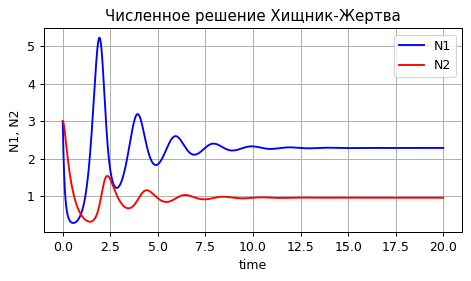

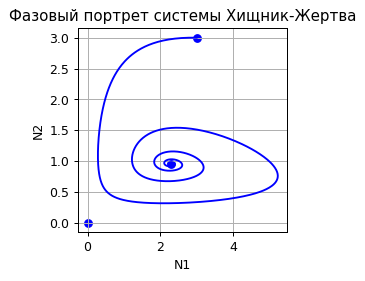

In [47]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0],
    [2.288, 0.959]
]

analyze(falpha, nulls, starts, alpha = -0.3)

Вывод: при добавлении логистической поправки меняется топология системы, изменяется координата второй точки равновесия и ее тип. В данном случае при alpha = 0.3 координата второй точки (2.288, 0.959), а ее тип устойчивый фокус.

In [0, 0] point


c:\users\bigzet\appdata\local\programs\python\python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


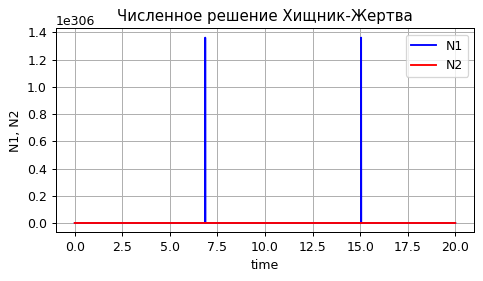

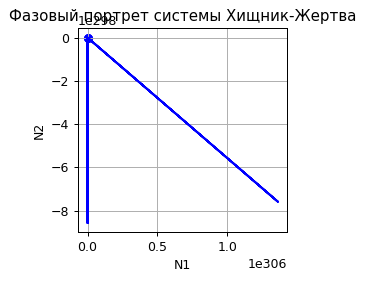

In [1, 1] point


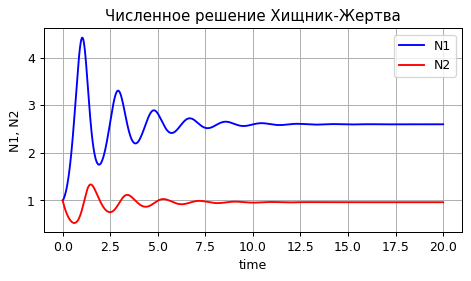

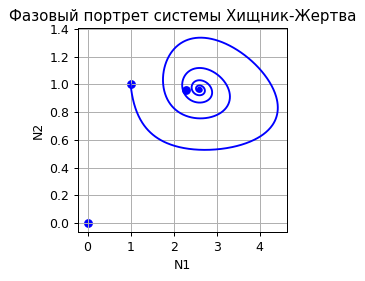

In [3, 3] point


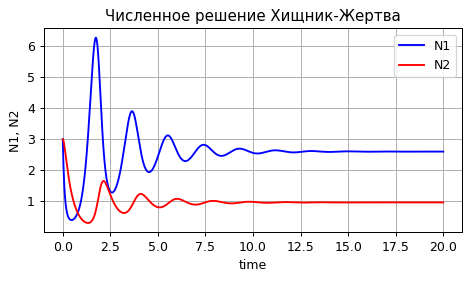

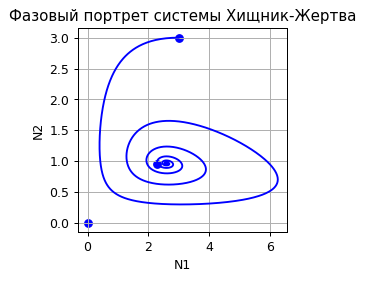

In [50]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0],
    [2.288, 0.959]
]

analyze(falpha, nulls, starts, alpha = -0.3, err = 0.3)

Вывод: модель Лотки-Вольтерра с логистической поправкой структурна устойчива, вторая точка равновесия поменяла свою координату, но сохранила тип - устойчивый фокус

In [0, 0] point


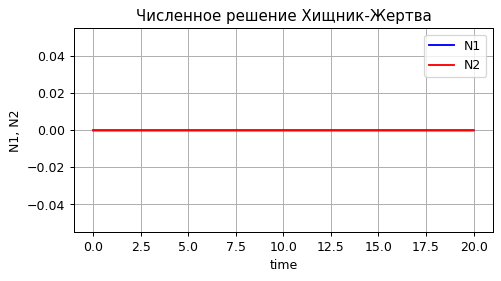

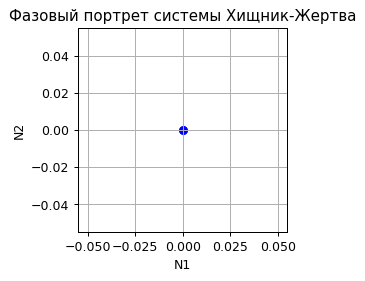

In [1, 1] point


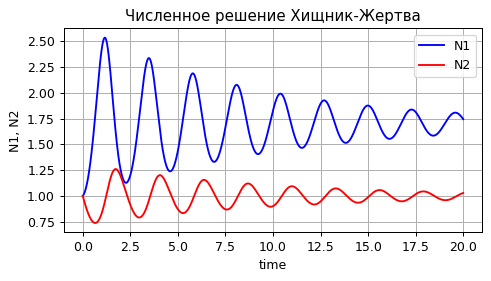

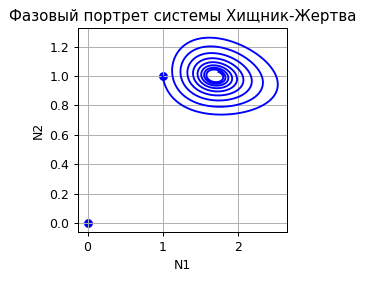

In [3, 3] point


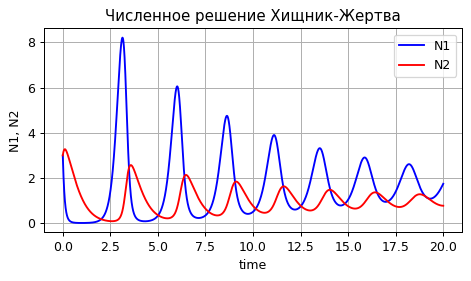

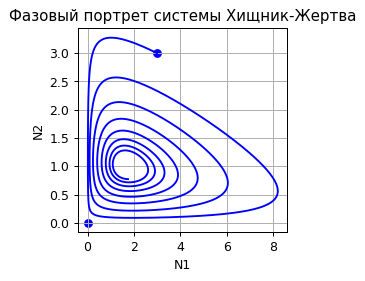

In [54]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0]
]

analyze(falphapm, nulls, starts, alpha = -0.3)

Вывод: при переменных альфа модели Л-В. с лог. поправкой структурно эквивалентны.

In [0, 0] point


c:\users\bigzet\appdata\local\programs\python\python39\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


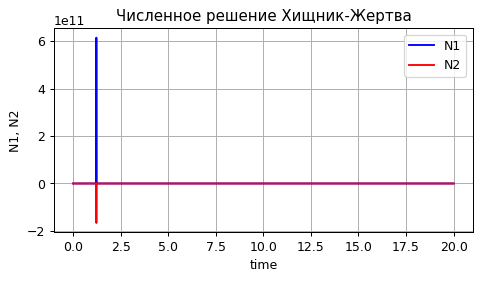

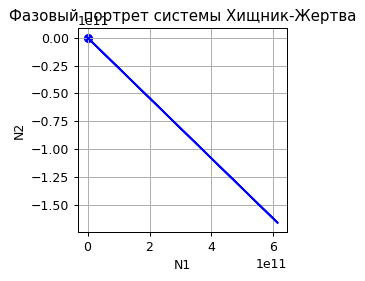

In [1, 1] point


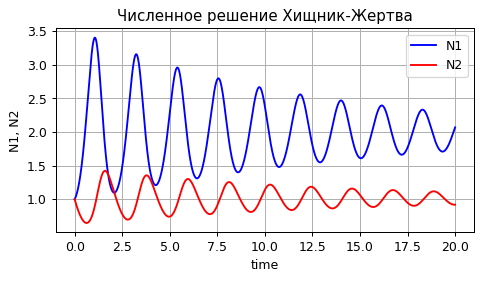

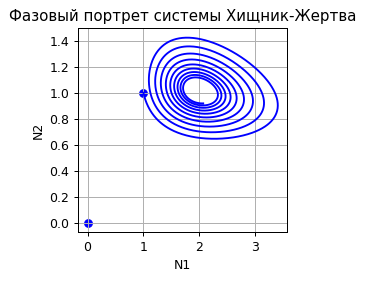

In [3, 3] point


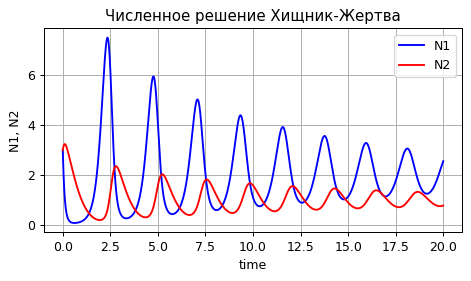

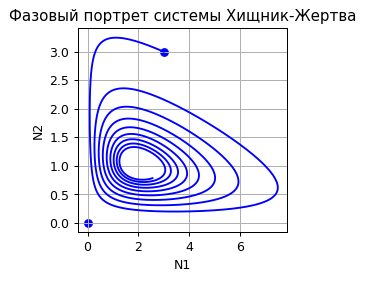

In [56]:
starts = [
    [0, 0],
    [1, 1],
    [3, 3]
]

nulls = [
    [0, 0]
]

analyze(falphapm, nulls, starts, alpha = -0.3, err = 0.3)

Вывод: модель Л-В с логист. поправкой при переменных альфа также структурно устойчива.